===== SVM on Iris Dataset (Linearly Separable) =====
Accuracy (Linear Kernel): 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


===== SVM on Moons Dataset (Linearly Non-Separable) =====
Accuracy (RBF Kernel): 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        28

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



NameError: name 'np' is not defined

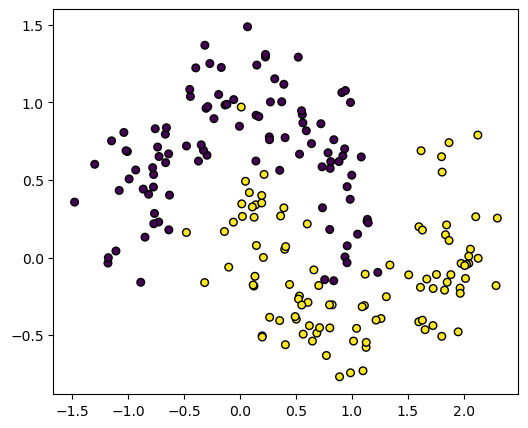

In [1]:
#6.Design and implement SVM for classification with the proper dataset of your choice commenton design and implementation for linearly non sepearble datsset
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ---------------- LINEARLY SEPARABLE DATA (Iris) ----------------
print("===== SVM on Iris Dataset (Linearly Separable) =====")
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Kernel SVM
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---------------- LINEARLY NON-SEPARABLE DATA (Moons) ----------------
print("\n===== SVM on Moons Dataset (Linearly Non-Separable) =====")
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RBF Kernel SVM (handles non-linear data)
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---------------- VISUALIZATION ----------------
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30, edgecolors="k")
    
    # Create grid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 200),
        np.linspace(ylim[0], ylim[1], 200)
    )
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], alpha=0.7,
                linestyles=["--", "-", "--"])
    plt.title(title)
    plt.show()

# Visualize only Moons dataset (2D)
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel (Moons Dataset)")
